In [1]:
import tensorflow as tf

# Load images of hand-witten digits 0-9
mnist = tf.keras.datasets.mnist 

(x_train, y_train), (x_test, y_test) = mnist.load_data()

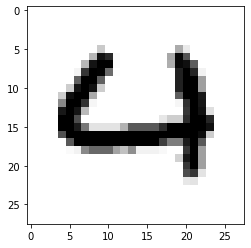

In [87]:
import matplotlib.pyplot as plt

#plt.imshow(x_train[0])
plt.imshow(x_train[60], cmap = plt.cm.binary)
plt.show()

In [88]:
import tensorflow as tf

# Normalize data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [89]:
import tensorflow as tf

# Build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

# Hiddens layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)  # train the model



Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 3s 42us/sample - loss: 0.2663 - accuracy: 0.9226
Epoch 2/3
60000/60000 [==============================] - 2s 38us/sample - loss: 0.1065 - accuracy: 0.9667
Epoch 3/3
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0724 - accuracy: 0.9769


In [90]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 2s 41us/sample - loss: 0.2565 - accuracy: 0.9244
Epoch 2/3
60000/60000 [==============================] - 2s 39us/sample - loss: 0.1059 - accuracy: 0.9673
Epoch 3/3
10000/10000 [==============================] - 0s 28us/sample - loss: 0.0869 - accuracy: 0.9738
0.08689346863725222
0.9738


In [91]:
model.save('epic_num_reader.model')

INFO:tensorflow:Assets written to: epic_num_reader.model\assets


In [92]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [93]:
predictions = new_model.predict(x_test)
print(predictions)

[[9.5430162e-09 1.7404842e-08 3.4783918e-06 ... 9.9998724e-01
  2.3149748e-06 1.1795308e-06]
 [6.5714348e-12 1.1089537e-05 9.9996591e-01 ... 1.3795656e-10
  8.4116061e-07 3.3525391e-13]
 [1.5641395e-09 9.9990118e-01 1.2882364e-06 ... 3.4071934e-05
  3.2400687e-06 7.0307487e-07]
 ...
 [2.0430690e-09 9.5813270e-08 1.9156357e-09 ... 1.2212144e-05
  3.8014134e-06 1.7544591e-04]
 [3.2482948e-08 1.1515408e-08 5.5270295e-09 ... 9.9436548e-09
  1.7684978e-04 7.3785072e-10]
 [1.8646131e-07 1.4034071e-10 1.0867705e-08 ... 1.5192656e-11
  2.2409718e-07 2.4742011e-10]]


In [94]:
import numpy as np

print(np.argmax(predictions[0]))

7


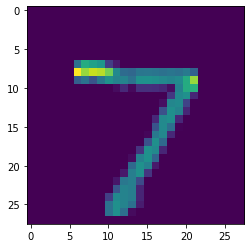

In [95]:
plt.imshow(x_test[0])
plt.show()